In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from collections import Counter
import string
import re

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package stopwords to C:\Users\Keerthi A
[nltk_data]     Rao\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Load the dataset
df = pd.read_csv('emails.csv')

# Basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83448 entries, 0 to 83447
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   83448 non-null  int64 
 1   text    83448 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.3+ MB


In [3]:
# Preview data
df.head()


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
# Check for missing values
df.isnull().sum()


label    0
text     0
dtype: int64

In [ ]:
# Check class distribution (0 = Not Spam, 1 = Spam)
df['label'].value_counts()

1    43910
0    39538
Name: label, dtype: int64

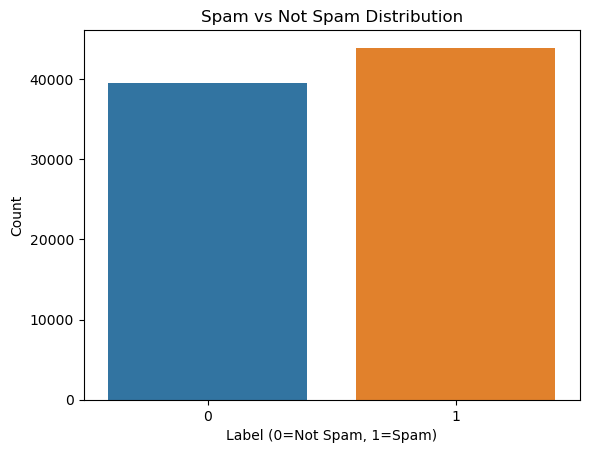

In [6]:
# Visualize label distribution
sns.countplot(data=df, x='label')
plt.title('Spam vs Not Spam Distribution')
plt.xlabel('Label (0=Not Spam, 1=Spam)')
plt.ylabel('Count')
plt.show()


In [15]:
def clean_text(text):
    text = re.sub(r'\\x[a-fA-F0-9]{2}', '', text)  # Remove hex escapes
    text = re.sub(r'\\u[a-fA-F0-9]{4}', '', text)  # Remove unicode escapes
    text = re.sub(r'http\S+', '', text)            # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)       # Keep only letters and whitespace
    text = re.sub(r'\s+', ' ', text)               # Normalize whitespace
    return text.strip().lower()


# Step 2: Apply cleaning
df['clean_text'] = df['text'].apply(clean_text)

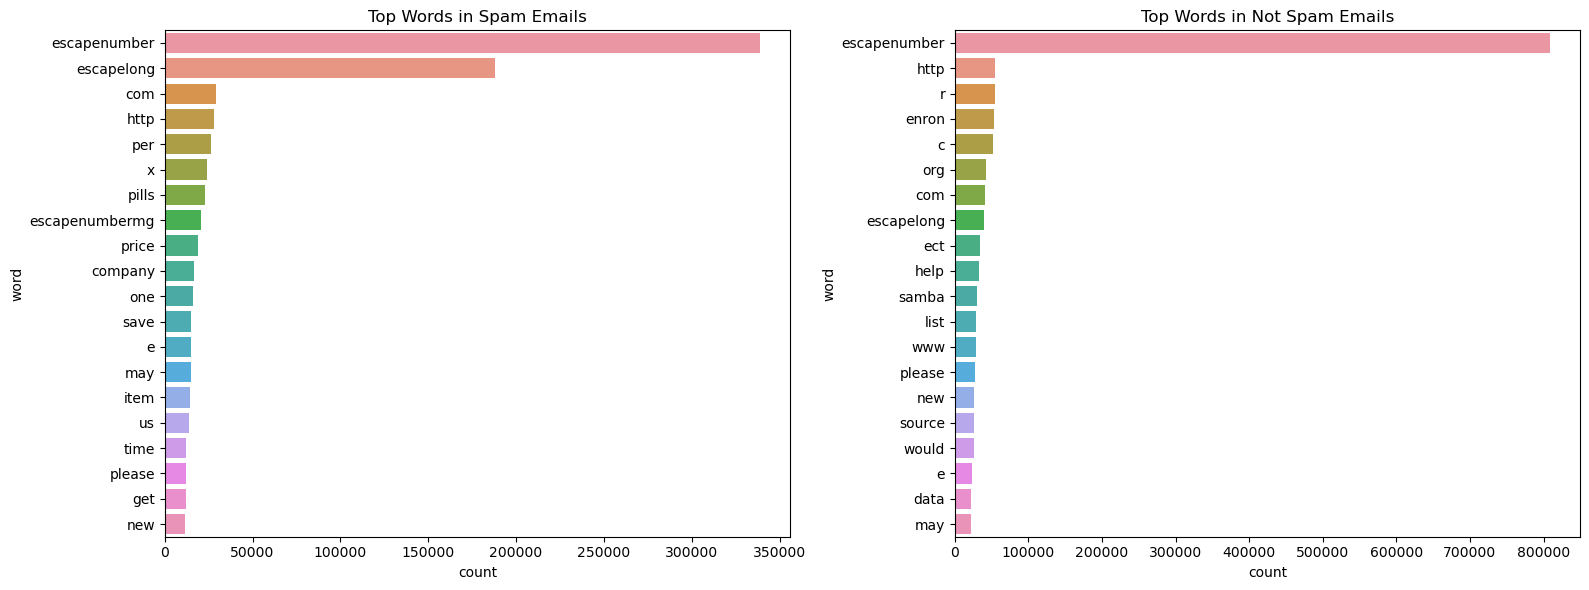

In [16]:
def get_common_words(text_series, n=20):
    all_words = ' '.join(text_series)
    words = [word.strip(string.punctuation) for word in all_words.split()]
    words = [word for word in words if word not in stop_words and word.isalpha()]
    return Counter(words).most_common(n)

# Step 4: Get top words
spam_words = get_common_words(df[df['label'] == 1]['clean_text'])
not_spam_words = get_common_words(df[df['label'] == 0]['clean_text'])

# Step 5: Convert to DataFrame for plotting
spam_df = pd.DataFrame(spam_words, columns=['word', 'count'])
not_spam_df = pd.DataFrame(not_spam_words, columns=['word', 'count'])

# Step 6: Plot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(data=spam_df, x='count', y='word', ax=axes[0])
axes[0].set_title('Top Words in Spam Emails')

sns.barplot(data=not_spam_df, x='count', y='word', ax=axes[1])
axes[1].set_title('Top Words in Not Spam Emails')

plt.tight_layout()
plt.show()